In [192]:
import matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import random
import time

sns.set_theme(style="ticks")
sns.set_palette("viridis")

### *0.1* LOAD DATA 

In [176]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## **DATA INFORMATION**

### 0.1 GENERAL INFORMATIONS

In [158]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### Data Types

In [159]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [177]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### 1.0 FEATURE ENGINEERING

> This specific dataset already has each feature properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [178]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [179]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

In [180]:
df_data= df_data[df_data['age'] >=18 ]

#Excluding people who have < 18 years

### 1.2 SPLITTING THE DATA

In [181]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96214, 9) (24054, 9) (96214,) (24054,)


# ANNOTATION
    balance_divided_creditlimit= as near to 0, the client doesn't have much LOAN
    DebtRatio = as near to 0, the client dont have high monthly cost

In [165]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
100287,0.029713,73,1.285113,1900.0,10,0,2,0,0.0
81467,0.136791,57,0.564293,6866.0,17,0,3,1,3.0
14866,0.043455,40,0.875516,8000.0,16,0,3,0,1.0
78665,0.109097,40,0.091458,26000.0,6,0,1,0,3.0
135935,0.017076,53,0.425050,1500.0,7,0,1,0,1.0


### 0.4 Balancing the targets 

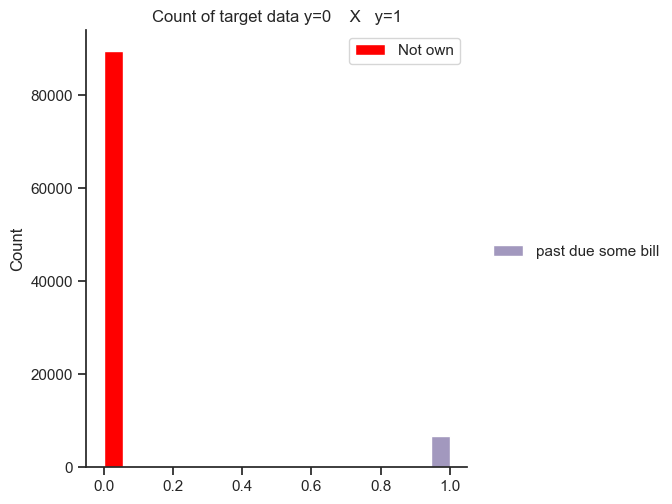

In [182]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')
plt.show()


In [183]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,89538,89538


## 0.5  EDA - Exploratory Data Analyses

### 0.5.1   -   General plots

array([[<Axes: title={'center': 'balance_divided_creditlimit'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'number_times_latepay60-89'}>,
        <Axes: title={'center': 'NumberOfDependents'}>]], dtype=object)

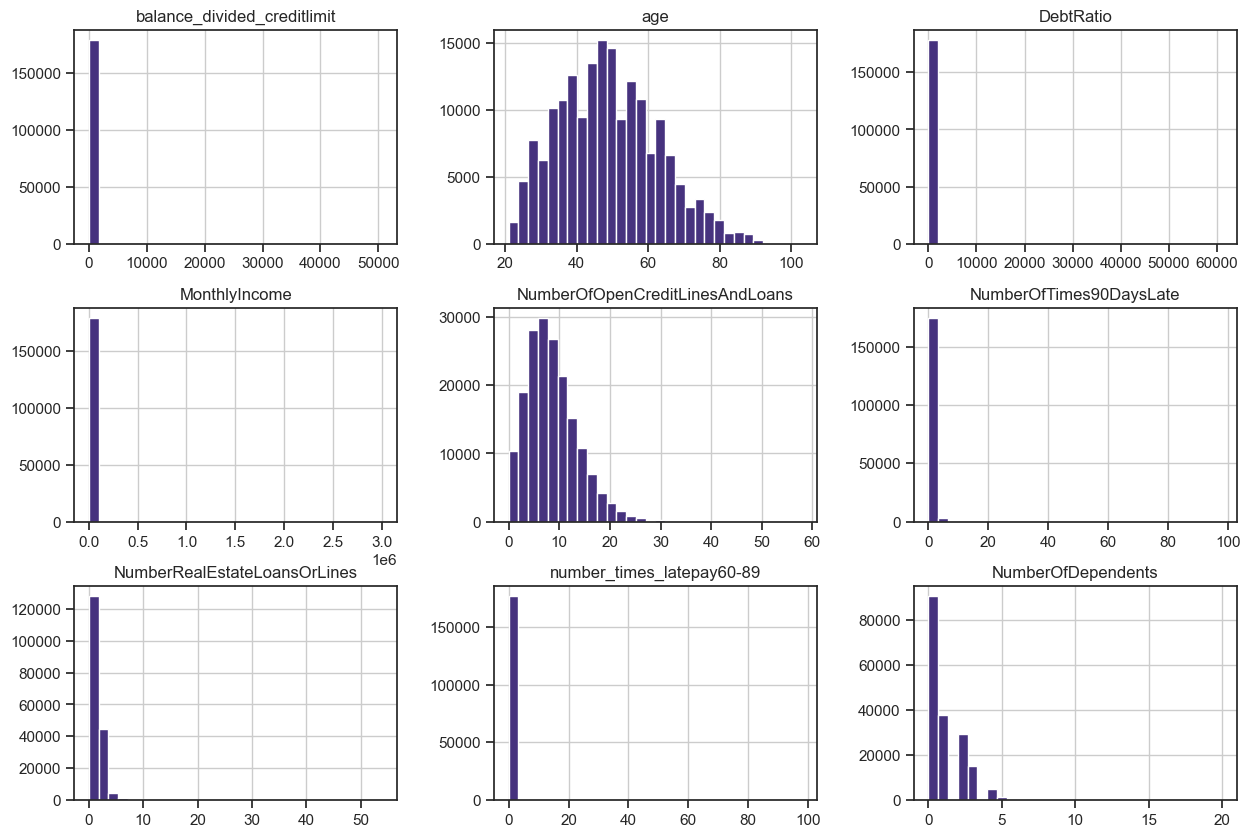

In [54]:
X_train[:].hist(figsize=(15,10), bins=30)

<Axes: >

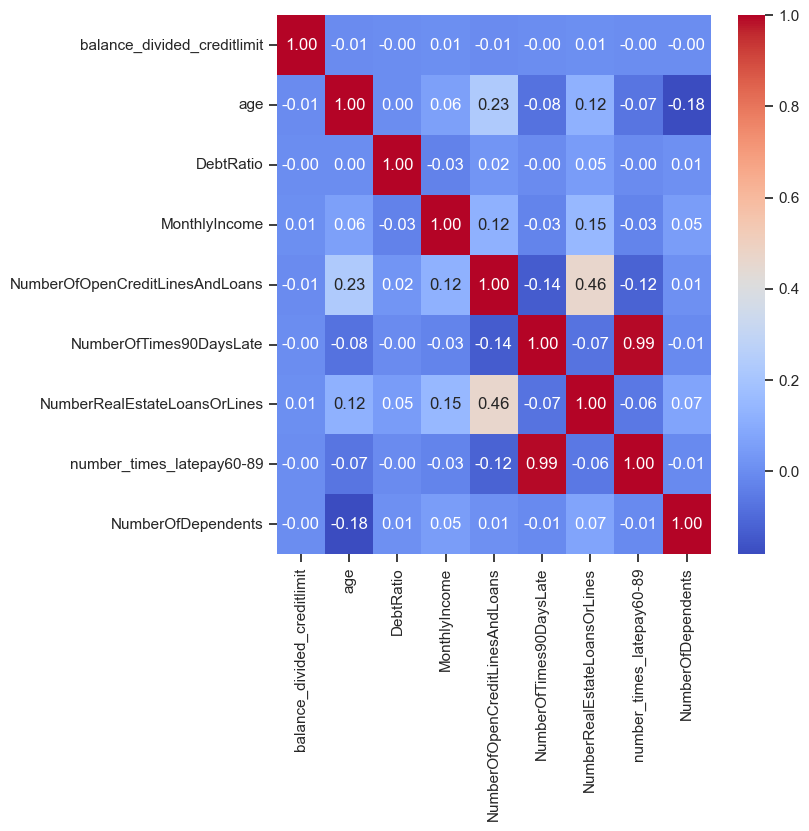

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='coolwarm',  fmt='.2f')
#Detecting correlations

### 0.5.1-1 Vizualizing sort of correlations betweeen features

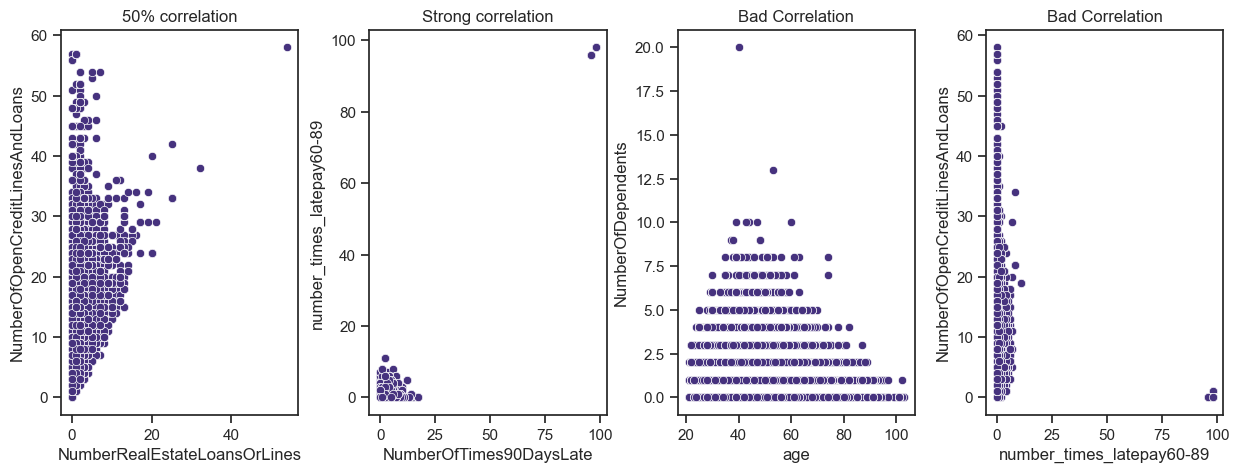

In [56]:
fig, axs =plt.subplots(1, 4, figsize=(15, 5))
sns.scatterplot(x=X_train['NumberRealEstateLoansOrLines'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[0])
axs[0].set_title('50% correlation')
sns.scatterplot(x=X_train['NumberOfTimes90DaysLate'], y=X_train['number_times_latepay60-89'],ax=axs[1])
axs[1].set_title('Strong correlation')
sns.scatterplot(x=X_train['age'], y=X_train['NumberOfDependents'],ax=axs[2])
axs[2].set_title('Bad Correlation')
sns.scatterplot(x=X_train['number_times_latepay60-89'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[3])
axs[3].set_title('Bad Correlation')
plt.subplots_adjust(wspace=0.3) 

### 0.5.2   -   Debt Ratio ㅤ       X       ㅤ Age

-   Young people seems to has less free money than olders

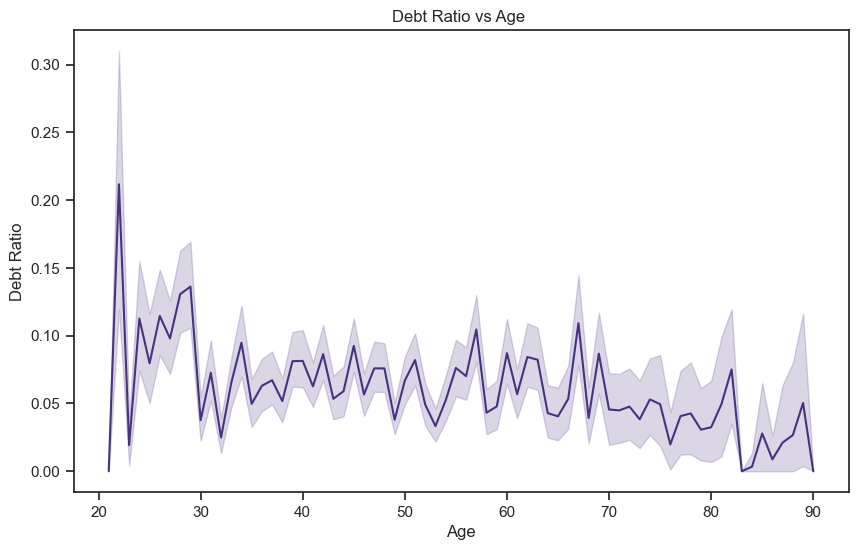

In [57]:

def debtDivided(value):
    if value >=0 and value<25:
        return 0   
    if  value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
    
particioned_data_2= X_train.iloc[:,2].apply(debtDivided)


particioned_data_2= pd.DataFrame(particioned_data_2)
particioned_data_2['Age']= X_train.iloc[:, 1]
particioned_data_2= particioned_data_2[particioned_data_2['Age'] <=90]      #removing extreme cases for better vizualization only



plt.figure(figsize=(10, 6))
sns.lineplot(data=particioned_data_2, x='Age', y='DebtRatio')

plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio vs Age ')
plt.show()


### 0.5.3       -       Past due    ㅤ    X   ㅤ    Number of dependents
-  Quantity of number of dependents of people that past due = 1  ㅤ   Xㅤ   past due = 0

Text(0.5, 0, 'number of dependents when pastdue = 0')

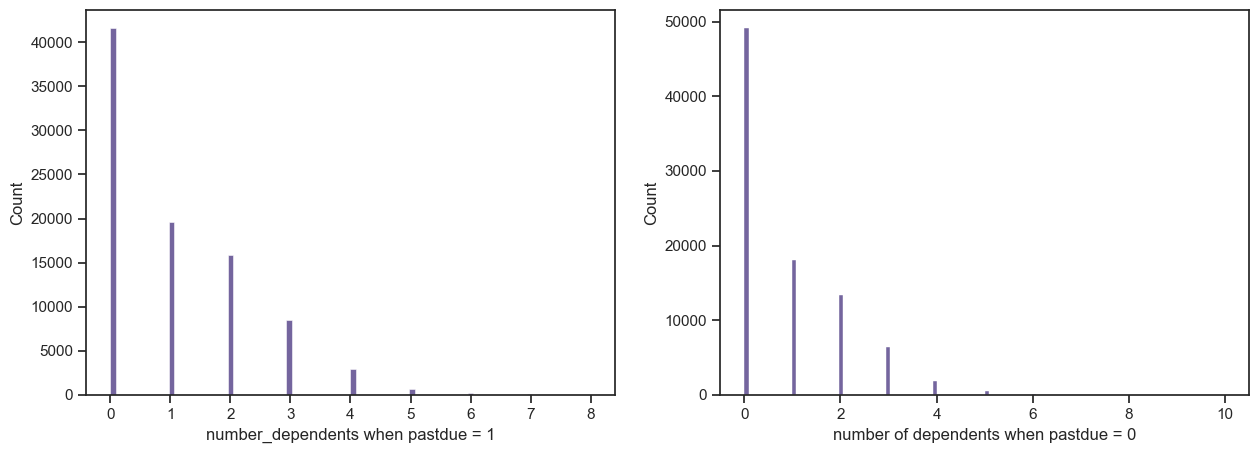

In [58]:

duedependents= pd.DataFrame()
due_to_0=      pd.DataFrame()
duedependents['number_dependents=1']= X_train.iloc[:, 8][y_train==1]
due_to_0['number_dependents_0']= X_train.iloc[:, 8][y_train==0]



fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(duedependents['number_dependents=1'], ax=axs[0])
axs[0].set_xlabel('number_dependents when pastdue = 1')
sns.histplot(due_to_0['number_dependents_0'], ax=axs[1], binrange=(0,10))
axs[1].set_xlabel('number of dependents when pastdue = 0')


### 0.5.4       Balance of credit limit ÷ sum of credit limit       ㅤX        ㅤPast due

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2710262629.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)


Text(0.5, 1.0, 'Balance÷sum creditlimit  X   Past due ')

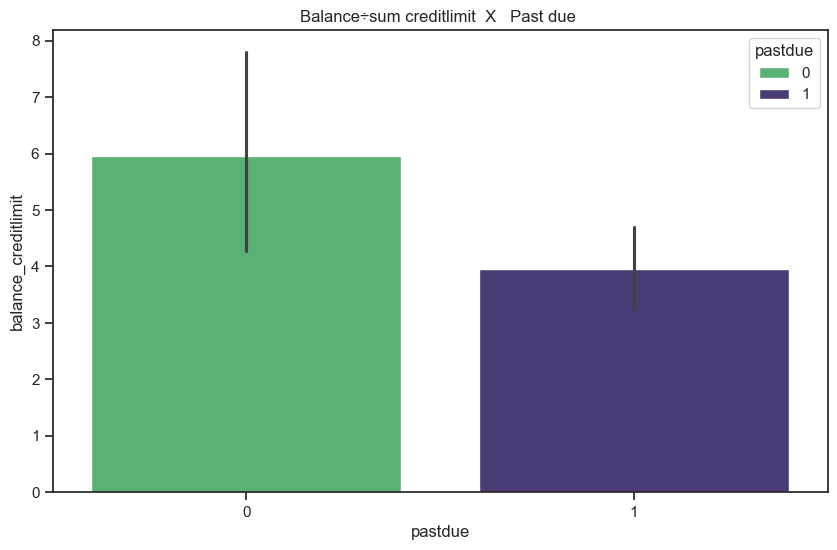

In [59]:
colors = sns.color_palette()
random.shuffle(colors)

balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = X_train.iloc[:, 0]
balancedue['pastdue']= y_train.iloc[:]
balancedue=balancedue.sort_index()


plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors)
plt.title('Balance÷sum creditlimit  X   Past due ')

### 0.5.5   -    Number of times people past due in last 2 years      ㅤX          ㅤCurrently has bills that are at least 90 days past due
> This can be considered a high valueable information, please check section 5.2

Text(0.5, 1.0, 'Number of times latepay 60-89 days  X   Past due in last 2 years')

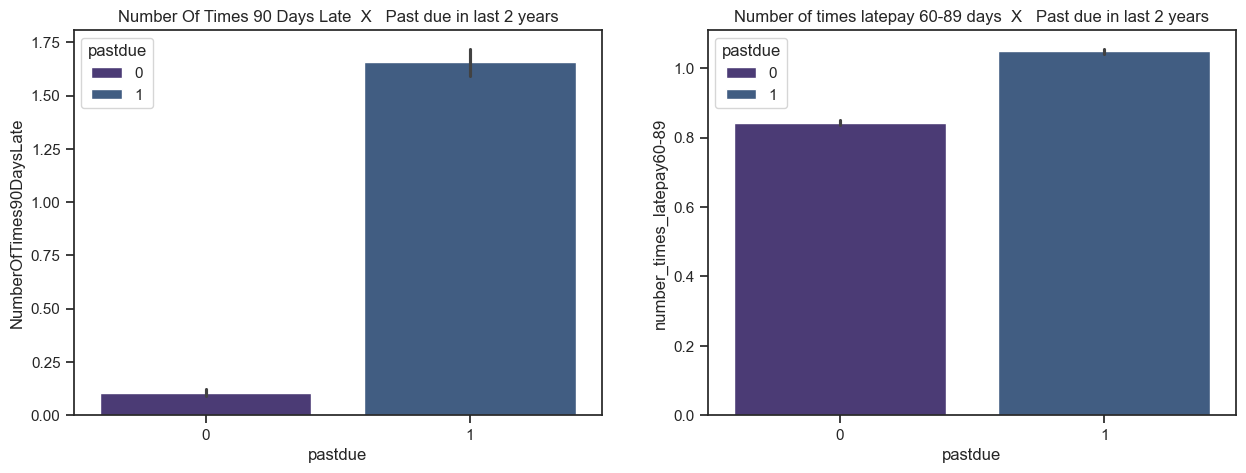

In [60]:

df_recurring= pd.DataFrame()
df_recurring['NumberOfTimes90DaysLate']= X_train['NumberOfTimes90DaysLate']
df_recurring['pastdue']= y_train
df_recurring['number_times_latepay60-89']= X_train.iloc[:, 8]
colors = sns.color_palette("viridis", n_colors=df_recurring['pastdue'].nunique())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(df_recurring, x='pastdue', y='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue')
axs[0].set_title('Number Of Times 90 Days Late  X   Past due in last 2 years')
sns.barplot(df_recurring, x='pastdue', y='number_times_latepay60-89', ax= axs[1], hue='pastdue')
axs[1].set_title('Number of times latepay 60-89 days  X   Past due in last 2 years')

### 0.5.5   -    Have people who have income less than 5000 owed any bills that has been expired for at least 90 days in the last two years?     


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_8708\2063580838.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]


Text(0, 0.5, 'Count')

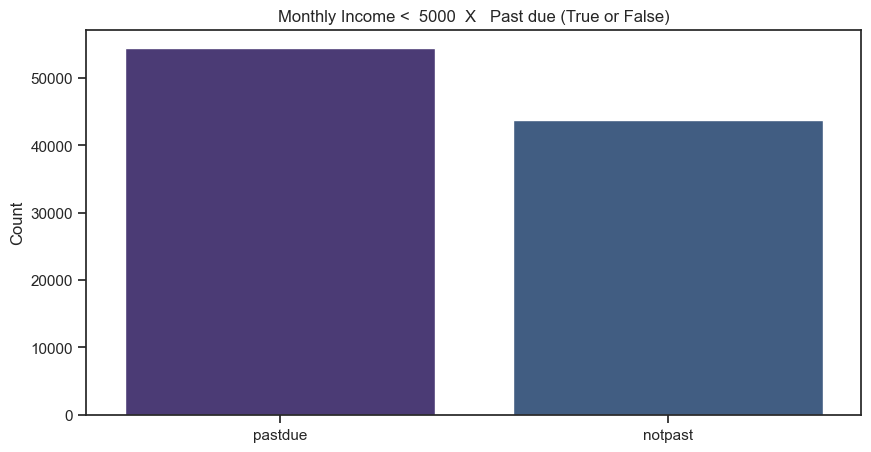

In [61]:

notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]
income_past= pd.DataFrame({'pastdue': past, 'notpast': notpast}, index=['quantity'])
plt.figure(figsize=(10,5))
sns.barplot(income_past)
plt.title('Monthly Income <  5000  X   Past due (True or False)')
plt.ylabel('Count')


### 1.0 DATA PRE-PROCESSING

### Changing data type

In [184]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


In [187]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(179076, 9) (179076,) (44746, 9) (44746,)


In [186]:
#Normalization
real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.000002,0.009782,0.000006,0.999947,0.003043,0.000000,0.000000,0.000000,0.000435
1,0.000207,0.017806,0.000337,0.999835,0.003484,0.000000,0.000387,0.000000,0.000774
2,0.000007,0.017997,0.000061,0.999833,0.003142,0.000286,0.000286,0.000000,0.000000
3,0.000124,0.012570,0.000060,0.999920,0.001428,0.000000,0.000000,0.000000,0.000286
4,0.000022,0.004912,0.000028,0.999988,0.000725,0.000000,0.000081,0.000000,0.000081
...,...,...,...,...,...,...,...,...,...
44741,0.000156,0.006855,0.000015,0.999976,0.000857,0.000000,0.000000,0.000171,0.000686
44742,0.000234,0.011950,0.000189,0.999926,0.002195,0.000000,0.000488,0.000000,0.000732
44743,0.000146,0.007847,0.000120,0.999969,0.000615,0.000923,0.000154,0.000000,0.000000
44744,0.000136,0.015598,0.000128,0.999875,0.002400,0.000400,0.000400,0.000000,0.000000


In [188]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Treinar o modelo KNN
knn_new = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)

# Fazer previsões de classe para os dados de teste
yhat_knn_new = knn_new.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, yhat_knn_new)

print(f'Acurácia do modelo KNN: {accuracy:.2f}')



Acurácia do modelo KNN: 0.66


,0
balance_divided_creditlimit,0.229172
age,0.119577
DebtRatio,0.116863
MonthlyIncome,0.092234
NumberOfOpenCreditLinesAndLoans,0.118016
NumberOfTimes90DaysLate,0.113124
NumberRealEstateLoansOrLines,0.074554
number_times_latepay60-89,0.073187
NumberOfDependents,0.063272


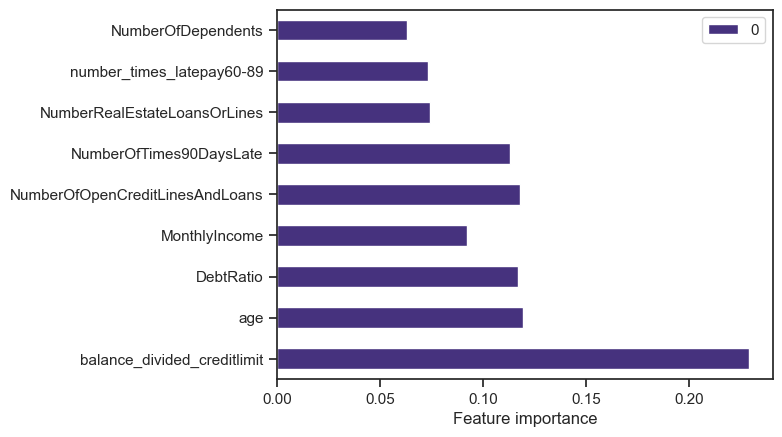

In [203]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importance = forest.feature_importances_

global_importances = pd.DataFrame(importance, index=X_train.columns)
global_importances.plot.barh()
plt.xlabel('Feature importance')

global_importances

In [204]:
forest_importance = forest.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, forest_importance)

print(f'Acurácia do modelo KNN: {accuracy:.2f}')


Acurácia do modelo KNN: 0.60


In [ ]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(y_test_rsld.shape)
from sklearn.metrics import accuracy_score


accuracy_score(y_test_rsld, acc_teste)

(44858,)


0.6631593026884837